## Plot all CR local flux measurements

### Plot CR measurements in rigidity

We report flux measurements differential in rigidity, so that $\phi(R) \equiv \frac{dN}{dR}$.


In [2]:
"""Import plotting libraries"""
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def plot_data(filename, slope_plot, color, fmt):
    """Read and plot measurements multiplied by R^-slope_plot"""
    x, y, err_y_lo, err_y_up = np.loadtxt(filename, skiprows=2, usecols=(0,1,2,3), unpack=True)
    y_err = [x**slope_plot * err_y_lo, x**slope_plot * err_y_up]
    plt.errorbar(x, x**slope_plot * y, yerr=y_err, fmt=fmt, color=color)    

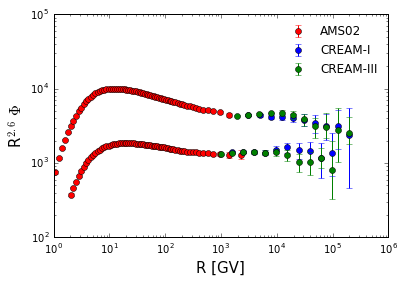

In [5]:
plot_data('kiss_tables/H_AMS02_rigidity.txt', 2.6, 'r', 'o'), 
plot_data('kiss_tables/H_CREAMI_rigidity.txt', 2.6, 'b', 'o'), 
plot_data('kiss_tables/H_CREAMIII_rigidity.txt', 2.6, 'g', 'o'), 
plt.legend(['AMS02', 'CREAM-I', 'CREAM-III'], frameon=False, loc='best', numpoints=1)

plot_data('kiss_tables/He_AMS02_rigidity.txt', 2.6, 'r', 'o'), 
plot_data('kiss_tables/He_CREAMI_rigidity.txt', 2.6, 'b', 'o'), 
plot_data('kiss_tables/He_CREAMIII_rigidity.txt', 2.6, 'g', 'o'), 

plt.xscale('log'), plt.yscale('log')
plt.xlim([1e0, 1e6]), plt.ylim([1e2, 1e5])
plt.xlabel('R [GV]', fontsize=15), plt.ylabel(r'R$^{2.6}$ $\Phi$', fontsize=15)
plt.show()

(-0.63722883347918258, 3.8129489489093515)


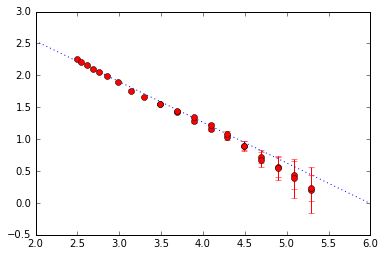

In [79]:
x_fit = []
y_fit = []
y_err_fit = []

def add_data_points(filename):
    x, y, err_y_lo, err_y_up = np.loadtxt(filename, skiprows=2, usecols=(0,1,2,3), unpack=True)
    for i in range(len(x)):
        if x[i] > 300.:
            x_fit.append(x[i])
            y_fit.append(y[i])
            y_err_fit.append(err_y_up[i])

add_data_points('kiss_tables/H_AMS02_rigidity.txt')
add_data_points('kiss_tables/H_CREAMI_rigidity.txt')
add_data_points('kiss_tables/H_CREAMIII_rigidity.txt')

size = len(x_fit)
logx_fit = np.zeros(size)
logy_fit = np.zeros(size)
logy_err_fit = np.zeros(size)

for i in range(size):
    logx_fit[i] = np.log10(x_fit[i])
    logy_fit[i] = np.log10(x_fit[i] * x_fit[i] * y_fit[i])
    logy_err_fit[i] = np.log10(1. + y_err_fit[i] / y_fit[i])

m, b = np.polyfit(logx_fit, logy_fit, 1, w = 1. / logy_err_fit) 

print (m, b)

R = np.linspace(2, 6, 100)

y = b + m * R

plt.plot(R, y, ':')

plt.errorbar(logx_fit, logy_fit, yerr=logy_err_fit, fmt='o', color='r')    
#plt.xlim([5e2, 1e6]), plt.ylim([2e2, 1e4])
#plt.xlabel('R [GV]', fontsize=15), plt.ylabel(r'R$^{2.6}$ $\Phi$', fontsize=15)
plt.show()
        

In [ ]:
He = -2.6, H = -2.7